In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import re

In [ ]:
main_data = pd.read_csv("/content/dane7.csv")

In [ ]:
data = main_data.copy()

In [ ]:
###PART 1

In [ ]:
# Replace abbreviated weekday names with english equivalents (full weekday names) - created_at column
#Replace abbreviated month names with numerical equivalents (e.g. Jun to 06) - user_created_at column


weekday_map = {
    'Mon': 'Monday',
    'Tue': 'Tuesday',
    'Wed': 'Wednesday',
    'Thu': 'Thursday',
    'Fri': 'Friday',
    'Sat': 'Saturday',
    'Sun': 'Sunday'
}


month_map = {
    "Jan": "01",
    "Feb": "02",
    "Mar": "03",
    "Apr": "04",
    "May": "05",
    "Jun": "06",
    "Jul": "07",
    "Aug": "08",
    "Sep": "09",
    "Oct": "10",
    "Nov": "11",
    "Dec": "12"
}

In [ ]:
def process_created_at(date_str):
    # Replace weekdays
    for abbr, full in weekday_map.items():
        date_str = date_str.replace(abbr, full)
    # Replace months
    for abbr, num in month_map.items():
        date_str = re.sub(rf"\b{abbr}\b", num, date_str)
    return date_str

In [ ]:
data['created_at'] = data['created_at'].apply(process_created_at)

In [ ]:
print(data.columns.tolist())

['coordinates', 'created_at', 'hashtags', 'media', 'urls', 'favorite_count', 'id', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place', 'possibly_sensitive', 'quote_id', 'retweet_count', 'retweet_id', 'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at', 'user_id', 'user_default_profile_image', 'user_description', 'user_favourites_count', 'user_followers_count', 'user_friends_count', 'user_listed_count', 'user_location', 'user_name', 'user_screen_name', 'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified']


In [ ]:
# Get all links to tweets and pass them to the list
tweet_links_column = "tweet_url"
tweet_links_list = data[tweet_links_column].tolist()

In [ ]:
#Get all links found in tweets and pass them to the list (urls column)
links_in_tweets_column = "urls"
links_in_tweets_list = data[links_in_tweets_column].tolist()

In [ ]:
#Get all image links and pass them to the list (media column)
image_links_column = "media"
image_links_list = data[image_links_column].tolist()

In [ ]:
#Remove all words marked as stopwords and pass the cleaned text to a new column called text_without_stopwords.
import spacy
!python -m spacy download en_core_web_sm

nlp = spacy.load("en_core_web_sm")

def remove_stopwords_spacy(text):
    if isinstance(text, str):
        doc = nlp(text)
        filtered_words = [token.text for token in doc if not token.is_stop and not token.is_punct]
        return ' '.join(filtered_words)
    return text

data["text_without_stopwords"] = data["text"].apply(remove_stopwords_spacy)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
data.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
0,NaN,Friday 06 04 15:00:49 +0000 2021,StudioRN Kowaliński Konfederacja,NaN,NaN,0,1400829903591854083,NaN,NaN,NaN,...,1783,1,Poland,Bożydar Siepacz 🇵🇱,d3bil0x,64424,NaN,NaN,False,💬 @AKowalinski prezes RN Warszawa Profanacje a...
1,NaN,Friday 06 04 15:34:48 +0000 2021,NaN,NaN,NaN,0,1400838456276918278,NaN,NaN,NaN,...,1,31,Lon,Football Live Scores,ftg_soccer,620335,NaN,http://www.frogthegambler.com,False,GOAL Ursus Warszawa Poland 3 Liga \n Ursus War...
2,NaN,Friday 06 04 15:00:23 +0000 2021,NaN,NaN,NaN,0,1400829794598666245,NaN,NaN,NaN,...,402,0,NaN,marek,marek14618246,5346,NaN,NaN,False,Scena 50 Pogrzeb Jarosława Kaczyńskiego Polska...
3,NaN,Friday 06 04 15:12:26 +0000 2021,NaN,NaN,NaN,0,1400832826812121093,NaN,NaN,NaN,...,7266,7,Poland,tokmada,tokmada,109080,NaN,NaN,False,Warszawa 04 06 2021 \n Bojówki OrdoZjebów w ak...
4,NaN,Friday 06 04 14:39:29 +0000 2021,NaN,NaN,NaN,0,1400824535499280386,trzaskowski_,1.400817e+18,370112160.0,...,3,0,Warszawa,Krystyna,Krystyn01906241,748,NaN,NaN,False,@trzaskowski @Tsihanouskaya @M_K_Blonska @EDGr...


In [ ]:
### PART 2
#List the top 5 tweets with the highest number of likes

top_liked = data['favorite_count'].nlargest(5)
top_liked

,favorite_count
484,1384
1124,743
4770,624
3692,605
3193,553


In [ ]:
#List the top 5 tweets with the highest number of retweets.
top_retweeted = data['retweet_count'].nlargest(5)
top_retweeted

,retweet_count
4396,1638
618,896
1173,865
3915,865
4758,865


In [ ]:
#Show only tweets that are not considered 'sensitive'
not_sensitive_tweets = data[data['possibly_sensitive'] == False]
not_sensitive_tweets

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
7,NaN,Friday 06 04 15:19:37 +0000 2021,NaN,NaN,http://m.in https://wydarzenia.interia.pl/pols...,1,1400834632153718786,NaN,NaN,NaN,...,405,297,"Kraków, Poland",Interia,Int_Wydarzenia,128982,NaN,http://wydarzenia.interia.pl,False,W uroczystości wzięła udział https://t.co/V8xU...
9,NaN,Friday 06 04 14:53:31 +0000 2021,NaN,https://twitter.com/piekoshevski/status/140082...,NaN,22,1400828064096002049,NaN,NaN,NaN,...,759,11,"Warszawa, Polska",Jakub 💙💛,piekoshevski,23010,NaN,NaN,False,właśnie w tym miejscu przedwojenna Warszawa st...
15,NaN,Friday 06 04 15:02:30 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/najnowsze/warszaw...,5,1400830326939729924,NaN,NaN,NaN,...,21,427,Warszawa,TVN Warszawa,tvnwarszawa,86124,NaN,http://www.tvnwarszawa.pl,True,Park został otwarty dla mieszkańców w 1955 rok...
16,NaN,Friday 06 04 15:35:47 +0000 2021,NaN,https://twitter.com/Tomasz_Walczak/status/1400...,NaN,4,1400838699928129536,galopujacymajor,NaN,86394645.0,...,1779,50,Warszawa,Tomasz Walczak,Tomasz_Walczak,31835,NaN,http://se.pl,False,@galopujacymajor sobie gdzieś tam libkuje poza...
17,NaN,Friday 06 04 15:34:43 +0000 2021,NaN,NaN,"https://ipn.gov.pl/pl/aktualnosci/40962,Promoc...",6,1400838431677292551,NaN,NaN,NaN,...,2446,2,"Szczecin, Poland",Regionalny Ośrodek Debaty Międzynarodowej Szcz...,RODMwSzczecinie,3447,NaN,http://www.rodm-szczecin.pl,False,61 lat temu zmarł gen Józef Haller \n IPN WBH ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5068,NaN,Tuesday 06 01 04:23:56 +0000 2021,NaN,NaN,https://twitter.com/LukaszKohut/status/1399474...,0,1399582463572258828,NaN,NaN,NaN,...,3509,5,"Dolnośląskie, Polska",Jacenty,Jacenty51437933,16964,NaN,NaN,False,Dla tego debil Warszawa zawsze Warschau https:...
5070,NaN,Tuesday 06 01 03:48:11 +0000 2021,kosaciecżółty obpowsin irispseudoacorus ogródb...,https://twitter.com/obpowsin/status/1399573466...,NaN,22,1399573466458775555,NaN,NaN,NaN,...,146,4,"Warszawa, Polska",Ogród Botaniczny PAN,obpowsin,1269,NaN,http://www.ogrod-powsin.pl,False,kosaciecżółty zasiedla stanowiska o pozwyższon...
5072,NaN,Tuesday 06 01 04:48:40 +0000 2021,Tegodnia orlen lotto mazowsze muzeum warszawa ...,https://twitter.com/MuzeumSportu/status/139958...,NaN,5,1399588686614892549,NaN,NaN,NaN,...,1025,8,"Warszawa, Polska",Muzeum Sportu,MuzeumSportu,6700,NaN,http://www.muzeumsportu.waw.pl,False,📆 Tegodnia 4️⃣3️⃣ LATA TEMU \n\n W Argentynie ...
5076,NaN,Tuesday 06 01 05:08:02 +0000 2021,NaN,NaN,"https://warszawa.wyborcza.pl/warszawa/7,54420,...",0,1399593557841829889,NaN,NaN,NaN,...,365,152,NaN,Wyborcza.pl Warszawa,GazetaStoleczna,40364,NaN,http://warszawa.wyborcza.pl,False,W tunelu południowej obwodnicy Warszawy pod Ur...


In [ ]:
#Show the tweets of the user who created the account earliest (of all users in the dataset) (user_created_at column).
earliest_user = data['user_created_at'].min()
earliest_user_tweets = data[data['user_created_at'] == earliest_user]
earliest_user_tweets

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
4093,NaN,Tuesday 06 01 16:24:41 +0000 2021,NaN,NaN,https://share.legia.com/7gfS,0,1399763844780728321,NaN,NaN,NaN,...,112,0,"Warszawa, Polska",Jacob,Cubon_1916,15517,NaN,NaN,False,Paweł Wszołek odchodzi z Legii Warszawa Dzięku...


In [ ]:
#Show the tweets of the user with the most followers.
most_followers = data['user_followers_count'].max()
most_followers_tweets = data[data['user_followers_count'] == most_followers]
most_followers_tweets

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
1550,NaN,Thursday 06 03 11:01:43 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/praga-polnoc/wars...,0,1400407341875466242,NaN,NaN,NaN,...,71,2128,Poland,tvn24,tvn24,370767,NaN,http://www.tvn24.pl,True,Jego spokój pozytywnie udziela się pozostałym ...
1792,NaN,Thursday 06 03 07:34:35 +0000 2021,NaN,NaN,NaN,0,1400355214381752329,NaN,NaN,NaN,...,71,2128,Poland,tvn24,tvn24,370767,NaN,http://www.tvn24.pl,True,Zarząd Transportu Miejskiego zapowiada że częś...
2683,NaN,Wednesday 06 02 14:35:15 +0000 2021,NaN,NaN,NaN,0,1400098691860606976,NaN,NaN,NaN,...,71,2128,Poland,tvn24,tvn24,370767,NaN,http://www.tvn24.pl,True,Tylko w ostatnich czterech dniach zaszczepiliś...
2720,NaN,Wednesday 06 02 15:00:28 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/najnowsze/warszaw...,0,1400105038236860421,NaN,NaN,NaN,...,71,2128,Poland,tvn24,tvn24,370767,NaN,http://www.tvn24.pl,True,W środę po południu w okolicach mostu Świętokr...
4073,NaN,Tuesday 06 01 17:00:13 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/wola/warszawa-pow...,0,1399772787363958784,NaN,NaN,NaN,...,71,2128,Poland,tvn24,tvn24,370767,NaN,http://www.tvn24.pl,True,Sprawcy szuka policja \n\n https://t.co/J5YwjO...
4737,NaN,Tuesday 06 01 09:19:08 +0000 2021,NaN,NaN,NaN,0,1399656749586604036,NaN,NaN,NaN,...,71,2128,Poland,tvn24,tvn24,370767,NaN,http://www.tvn24.pl,True,Aktywista miejski Jan Śpiewak przegrał proces ...
4911,NaN,Tuesday 06 01 07:02:05 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/najnowsze/warszaw...,0,1399622262232391681,NaN,NaN,NaN,...,71,2128,Poland,tvn24,tvn24,370767,NaN,http://www.tvn24.pl,True,W poniedziałek późnym wieczorem na Mokotowie z...


In [ ]:
#Show only verified users (user_verified column).
verified_users = data[data['user_verified'] == True]
verified_users

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
15,NaN,Friday 06 04 15:02:30 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/najnowsze/warszaw...,5,1400830326939729924,NaN,NaN,NaN,...,21,427,Warszawa,TVN Warszawa,tvnwarszawa,86124,NaN,http://www.tvnwarszawa.pl,True,Park został otwarty dla mieszkańców w 1955 rok...
31,NaN,Friday 06 04 15:45:39 +0000 2021,NaN,NaN,"https://warszawa.wyborcza.pl/warszawa/7,54420,...",0,1400841186005356546,NaN,NaN,NaN,...,594,1658,Warszawa + 32 miasta,Gazeta Wyborcza.pl,gazeta_wyborcza,236360,NaN,http://www.wyborcza.pl,True,https://t.co/3TSBVAk63h \n Puby restauracje ju...
49,NaN,Friday 06 04 15:44:32 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/okolice/warszawa-...,5,1400840904403996672,NaN,NaN,NaN,...,21,427,Warszawa,TVN Warszawa,tvnwarszawa,86124,NaN,http://www.tvnwarszawa.pl,True,Uroczystości odbyły się w 29 rocznicę upadku j...
105,NaN,Friday 06 04 14:27:35 +0000 2021,4czerwca,NaN,NaN,0,1400821540804083717,NaN,NaN,NaN,...,1790,217,NaN,Adam Szłapka,adamSzlapka,16820,NaN,NaN,True,4czerwca w rocznicę pierwszych częściowo wolny...
132,NaN,Friday 06 04 13:45:25 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/najnowsze/warszaw...,5,1400810928766136323,NaN,NaN,NaN,...,21,427,Warszawa,TVN Warszawa,tvnwarszawa,86124,NaN,http://www.tvnwarszawa.pl,True,Kolejnym etapem produkcji będzie wyposażenie w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,NaN,Tuesday 06 01 05:03:08 +0000 2021,WspieramyRodziny DzieńDziecka,https://twitter.com/j_wisniewska/status/139959...,http://m.in,54,1399592325324619780,NaN,NaN,NaN,...,680,233,"województwo śląskie, PL",Jadwiga Wiśniewska,j_wisniewska,10492,NaN,http://www.jadwigawisniewska.pl,True,Dzieci największy skarb o który musimy dbać 👨 ...
5023,NaN,Tuesday 06 01 05:59:11 +0000 2021,NaN,NaN,NaN,0,1399606431616208897,NaN,NaN,NaN,...,41286,505,Deutschland,@parents4future@climatejustice.global,parents4future,203883,NaN,https://linktr.ee/parents4future,True,@GPietruczuk @RazemDlaBielan @DominikkKuc @Bie...
5034,NaN,Tuesday 06 01 05:08:26 +0000 2021,DzieńDziecka,https://twitter.com/DGWdowodztwo/status/139959...,NaN,4,1399593660421865475,NaN,NaN,NaN,...,385,37,"Warszawa, Polska",Dowództwo GW,DGWdowodztwo,2607,NaN,http://www.dgw.wp.mil.pl,True,W Dowództwie Garnizonu Warszawa DzieńDziecka o...
5049,NaN,Tuesday 06 01 05:16:48 +0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/srodmiescie/warsz...,1,1399595766931468295,NaN,NaN,NaN,...,21,427,Warszawa,TVN Warszawa,tvnwarszawa,86124,NaN,http://www.tvnwarszawa.pl,True,Śródmiejscy wywiadowcy zatrzymali dwóch podejr...


In [ ]:
#Indicate on which day of the week the tweets in the dataset were most frequently published.

data['day_of_week'] = data['created_at'].dt.day_name()
day_of_week_counts = data['day_of_week'].value_counts()

most_common_day = day_of_week_counts.idxmax()
most_common_day


'Wednesday'

In [ ]:
### PART 3
#Extract people (persName) and add them to a column called persons
text = data["text"].to_string()
nlp = spacy.load("en_core_web_sm")
def extract_persons(text):
    doc = nlp(text)
    persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']

    return persons

In [ ]:
data["persons"] = data["text"].apply(extract_persons)

In [ ]:
data

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords,day_of_week,persons
0,NaN,2021-06-04 15:00:49+00:00,StudioRN Kowaliński Konfederacja,NaN,NaN,0,1400829903591854083,NaN,NaN,NaN,...,Poland,Bożydar Siepacz 🇵🇱,d3bil0x,64424,NaN,NaN,False,💬 @AKowalinski prezes RN Warszawa Profanacje a...,Friday,[RN Warszawa]
1,NaN,2021-06-04 15:34:48+00:00,NaN,NaN,NaN,0,1400838456276918278,NaN,NaN,NaN,...,Lon,Football Live Scores,ftg_soccer,620335,NaN,http://www.frogthegambler.com,False,GOAL Ursus Warszawa Poland 3 Liga \n Ursus War...,Friday,"[Ursus Warszawa, SalPa]"
2,NaN,2021-06-04 15:00:23+00:00,NaN,NaN,NaN,0,1400829794598666245,NaN,NaN,NaN,...,NaN,marek,marek14618246,5346,NaN,NaN,False,Scena 50 Pogrzeb Jarosława Kaczyńskiego Polska...,Friday,"[Jarosława Kaczyńskiego, Polska, Warszawa, Mat..."
3,NaN,2021-06-04 15:12:26+00:00,NaN,NaN,NaN,0,1400832826812121093,NaN,NaN,NaN,...,Poland,tokmada,tokmada,109080,NaN,NaN,False,Warszawa 04 06 2021 \n Bojówki OrdoZjebów w ak...,Friday,[Warszawa]
4,NaN,2021-06-04 14:39:29+00:00,NaN,NaN,NaN,0,1400824535499280386,trzaskowski_,1.400817e+18,3.701122e+08,...,Warszawa,Krystyna,Krystyn01906241,748,NaN,NaN,False,@trzaskowski @Tsihanouskaya @M_K_Blonska @EDGr...,Friday,"[@Tsihanouskaya @M_K_Blonska, inicjatywa w cen..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,NaN,2021-06-01 02:04:38+00:00,NaN,NaN,NaN,0,1399547406107217922,NaN,NaN,NaN,...,NaN,Max,Max94842047,83708,NaN,NaN,False,Wyobraziłam sobie jakby wyglądała Warszawa g...,Tuesday,"[Wyobraziłam sobie, Warszawa]"
5098,NaN,2021-06-01 02:35:04+00:00,NaN,NaN,NaN,0,1399555063237025792,NaN,NaN,NaN,...,NaN,Marek Kopacz. #POLSKA W SERCU🇵🇱🇵🇱💪.🇵🇱🇵🇱👊,MarekKopacz10,205179,NaN,NaN,False,Rada Warszawy podjęła uchwałę krajobrazową dot...,Tuesday,"[Rada Warszawy, Radnym Warszawy, Lewica, Absur..."
5099,NaN,2021-06-01 02:56:11+00:00,NaN,NaN,NaN,0,1399560380473647105,NaN,NaN,NaN,...,Polska,Krystyna H.W.,Dosia1960,325092,NaN,NaN,False,Rada Warszawy podjęła uchwałę krajobrazową dot...,Tuesday,"[Rada Warszawy, Radnym Warszawy, Lewica, Absur..."
5100,NaN,2021-06-01 02:54:15+00:00,NaN,NaN,NaN,0,1399559891358998534,NaN,NaN,NaN,...,NaN,slawek,SlawekRetmaniak,67909,NaN,NaN,False,Zbliża się 81 rocznica Transportu KL Auschwitz...,Tuesday,"[KL Auschwitz, Społeczny Komitet, Warszawa, Ga..."


In [ ]:
#Extract places (placeName) and add them to a column called places
text = data["text"].to_string()
nlp = spacy.load("en_core_web_sm")
def extract_places(text):
    doc = nlp(text)
    places = [ent.text for ent in doc.ents if ent.label_ == 'LOC']

    return places

In [ ]:
data["places"] = data["text"].apply(extract_places)

In [ ]:
#Extract organisations (orgName) and place them in the column called organisations
text = data["text"].to_string()
nlp = spacy.load("en_core_web_sm")
def extract_organisations(text):
    doc = nlp(text)
    organisations = [ent.text for ent in doc.ents if ent.label_ == 'ORG']

    return organisations

In [ ]:
data["organisations"] = data["text"].apply(extract_organisations)

In [ ]:
data

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords,day_of_week,persons,places,organisations
0,NaN,2021-06-04 15:00:49+00:00,StudioRN Kowaliński Konfederacja,NaN,NaN,0,1400829903591854083,NaN,NaN,NaN,...,d3bil0x,64424,NaN,NaN,False,💬 @AKowalinski prezes RN Warszawa Profanacje a...,Friday,[RN Warszawa],[],[Profanacje]
1,NaN,2021-06-04 15:34:48+00:00,NaN,NaN,NaN,0,1400838456276918278,NaN,NaN,NaN,...,ftg_soccer,620335,NaN,http://www.frogthegambler.com,False,GOAL Ursus Warszawa Poland 3 Liga \n Ursus War...,Friday,"[Ursus Warszawa, SalPa]",[],[]
2,NaN,2021-06-04 15:00:23+00:00,NaN,NaN,NaN,0,1400829794598666245,NaN,NaN,NaN,...,marek14618246,5346,NaN,NaN,False,Scena 50 Pogrzeb Jarosława Kaczyńskiego Polska...,Friday,"[Jarosława Kaczyńskiego, Polska, Warszawa, Mat...",[],"[Powązki, Krematorium]"
3,NaN,2021-06-04 15:12:26+00:00,NaN,NaN,NaN,0,1400832826812121093,NaN,NaN,NaN,...,tokmada,109080,NaN,NaN,False,Warszawa 04 06 2021 \n Bojówki OrdoZjebów w ak...,Friday,[Warszawa],[],"[OrdoZjebów, ONR]"
4,NaN,2021-06-04 14:39:29+00:00,NaN,NaN,NaN,0,1400824535499280386,trzaskowski_,1.400817e+18,3.701122e+08,...,Krystyn01906241,748,NaN,NaN,False,@trzaskowski @Tsihanouskaya @M_K_Blonska @EDGr...,Friday,"[@Tsihanouskaya @M_K_Blonska, inicjatywa w cen...",[✌],"[@trzaskowski, @EDGrupinska @warszawa]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,NaN,2021-06-01 02:04:38+00:00,NaN,NaN,NaN,0,1399547406107217922,NaN,NaN,NaN,...,Max94842047,83708,NaN,NaN,False,Wyobraziłam sobie jakby wyglądała Warszawa g...,Tuesday,"[Wyobraziłam sobie, Warszawa]",[],[W]
5098,NaN,2021-06-01 02:35:04+00:00,NaN,NaN,NaN,0,1399555063237025792,NaN,NaN,NaN,...,MarekKopacz10,205179,NaN,NaN,False,Rada Warszawy podjęła uchwałę krajobrazową dot...,Tuesday,"[Rada Warszawy, Radnym Warszawy, Lewica, Absur...",[],[]
5099,NaN,2021-06-01 02:56:11+00:00,NaN,NaN,NaN,0,1399560380473647105,NaN,NaN,NaN,...,Dosia1960,325092,NaN,NaN,False,Rada Warszawy podjęła uchwałę krajobrazową dot...,Tuesday,"[Rada Warszawy, Radnym Warszawy, Lewica, Absur...",[],[]
5100,NaN,2021-06-01 02:54:15+00:00,NaN,NaN,NaN,0,1399559891358998534,NaN,NaN,NaN,...,SlawekRetmaniak,67909,NaN,NaN,False,Zbliża się 81 rocznica Transportu KL Auschwitz...,Tuesday,"[KL Auschwitz, Społeczny Komitet, Warszawa, Ga...",[],[się uroczysta inauguracja plakatu]


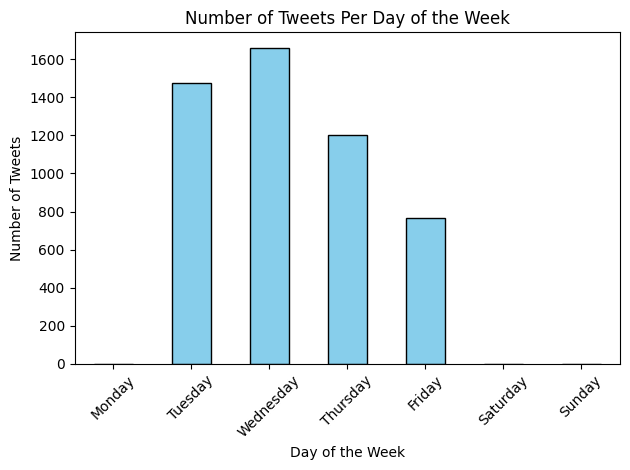

In [ ]:
### PART 4
#Using the matplotlib package, create a graph showing the number of tweets per day of the week.

import matplotlib.pyplot as plt

data["day_of_week"] = data["created_at"].dt.day_name()
day_of_week_counts = data["day_of_week"].value_counts()
tweet_counts = data['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

tweet_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Tweets Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()